# Import librairies

In [1]:
### Import libraries
## Standards
import pandas as pd
import numpy as np

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Pickles / Joblib
import pickle
# import joblib

## API
# import requests
# import json

## Time
# import time
# import datetime

## Modeling & Feature Engineering Librairies  
import sklearn
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression   
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, ClassifierMixin


# Set pandas display options
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

# Set seaborn default style
sns.set_style("ticks", {'axes.grid' : False})
sns.set_palette("deep")

# 

# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

In addition to the hypothesis above, we could add the following:
1. Married applicants
2. Applicants with Dependents
3. Applicants that have a salary over X
4. Applicants that have a co-applicants
5. Applicants that are asking for a loan that is respecting a certain ratio of their income

## 2. Data Exploration

### Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("../data/raw/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

Let's run our df thru some data cleaning:

### Data Cleaning

In [4]:
from woodPecker import dataCleaning
dataCleaning(
    df,
    code=False,
    tips=False,
    orientation=False,
    formatIssues=True,
    missingValues=True,
    duplicateValues=False,
    outliers=False,
)

FORMAT ISSUES

df.rename(columns={'Loan_ID': ''}, inplace=True) #rename column
df['Loan_ID'] = df['Loan_ID'].replace('old_value', 'new_value')
df['Loan_ID'] = df['Loan_ID'].astype('new_type') # new_type can be int64, float64, object, category, datetime64
df['Loan_ID'] = pd.get_dummies(df, columns=['Loan_ID'], drop_first=False) # Switch to True if you want to drop the first column
df.drop('Loan_ID', axis=1, inplace=True)
Loan_ID
LP001002    1
LP001003    1
LP001005    1
LP001006    1
LP001008    1
LP001011    1
LP001013    1
LP001014    1
LP001018    1
LP001020    1
LP001024    1
LP001027    1
LP001028    1
LP001029    1
LP001030    1
LP001032    1
LP001034    1
LP001036    1
LP001038    1
LP001041    1
LP001043    1
LP001046    1
LP001047    1
LP001050    1
LP001052    1
LP001066    1
LP001068    1
LP001073    1
LP001086    1
LP001087    1
LP001091    1
LP001095    1
LP001097    1
LP001098    1
LP001100    1
LP001106    1
LP001109    1
LP001112    1
LP001114    1
LP001116    1
LP001119

Results:
1. No formatting issues
2. Some column dtypes should be switched from float to int64
3. 7x columns with missing values -> Will need to decide if drop, fill, or leave as-is
4. 4x columns have outliers. -> Applicant_income & co_applicant_income ranges from 100 - 81000, is it possible some are monthly and others yearly?

In [5]:
#How many rows have missing values?
df.isnull().any(axis=1).sum()

134

In [6]:
### CLEANING CODE:

#### Column values:


#### Missing values:
###  Gender : 13  missing values
# df.dropna(subset=['Gender'], inplace=True)
# df['Gender'].fillna(df['Gender'].mean(), inplace=True) #fill NA entries with the mean
df['Gender'].fillna('Male', inplace=True) # fill NA entries with a single value, such as zero

###  Married : 3  missing values
# df.dropna(subset=['Married'], inplace=True)
# df['Married'].fillna(df['Married'].mean(), inplace=True) #fill NA entries with the mean
df['Married'].fillna('No', inplace=True) # fill NA entries with a single value, such as zer

###  Dependents : 15  missing values
# df.dropna(subset=['Dependents'], inplace=True)
# df['Dependents'].fillna(df['Dependents'].mean(), inplace=True) #fill NA entries with the mean
df['Dependents'].fillna(0, inplace=True) # fill NA entries with a single value, such as zero

###  Self_Employed : 32  missing values
# df.dropna(subset=['Self_Employed'], inplace=True)
# df['Self_Employed'].fillna(df['Self_Employed'].mean(), inplace=True) #fill NA entries with the mean
df['Self_Employed'].fillna('No', inplace=True) # fill NA entries with a single value, such as zero

###  LoanAmount : 22  missing values
# df.dropna(subset=['LoanAmount'], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True) #fill NA entries with the mean
# df['LoanAmount'].fillna(0, inplace=True) # fill NA entries with a single value, such as zero

###  Loan_Amount_Term : 14  missing values
# df.dropna(subset=['Loan_Amount_Term'], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True) #fill NA entries with the mean
# df['Loan_Amount_Term'].fillna(0, inplace=True) # fill NA entries with a single value, such as zero

###  Credit_History : 50  missing values
# df.dropna(subset=['Credit_History'], inplace=True)
# df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True) #fill NA entries with the mean
df['Credit_History'].fillna(0, inplace=True) # fill NA entries with a single value, such as zero


#### Column's dtypes:
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype('int64')
df['LoanAmount'] = df['LoanAmount'].astype('int64')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int64')
df['Credit_History'] = df['Credit_History'].astype('int64')


#### Duplicate values:


#### Outliers:

###  ApplicantIncome
## Outlier(s):
# Below  -12923.665736773899  ->  0  low outlier(s)
# Above  23730.584303549145  ->  8  high outlier(s)
# df = df[(df['ApplicantIncome'] > -12923.665736773899) & (df['ApplicantIncome'] < 23730.584303549145)]
## -> May need further investigation as it's possible some are yearly and not monthly and could just require a simple adaptation
# df.loc[df['ApplicantIncome'] > 10000, 'ApplicantIncome'] = df.loc[df['ApplicantIncome'] > 10000, 'ApplicantIncome'] / 12

###  CoapplicantIncome
## Outlier(s):
# Below  -7157.499309645475  ->  0  low outlier(s)
# Above  10399.990905699677  ->  6  high outlier(s)
#df = df[(df['CoapplicantIncome'] > -7157.499309645475) & (df['CoapplicantIncome'] < 10399.990905699677)]

###  LoanAmount
## Outlier(s):
# Below  -110.34981354495417  ->  0  low outlier(s)
# Above  403.1741378692785  ->  14  high outlier(s)
#df = df[(df['LoanAmount'] > -110.34981354495417) & (df['LoanAmount'] < 403.1741378692785)]

###  Loan_Amount_Term
## Outlier(s):
# Below  146.6387704361623  ->  12  low outlier(s)
# Above  537.3612295638377  ->  0  high outlier(s)
#df = df[(df['Loan_Amount_Term'] > 146.6387704361623) & (df['Loan_Amount_Term'] < 537.3612295638377)]

#### Label categories:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True) 
df = pd.get_dummies(df, columns=['Married'], drop_first=True) 
df = pd.get_dummies(df, columns=['Dependents'], drop_first=True) 
df = pd.get_dummies(df, columns=['Education'], drop_first=True) 
df = pd.get_dummies(df, columns=['Self_Employed'], drop_first=True) 
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=False) 

# df = pd.get_dummies(df, columns=['Gender'], dtype=bool, drop_first=True) 
# df = pd.get_dummies(df, columns=['Married'], dtype=bool, drop_first=True) 
# df = pd.get_dummies(df, columns=['Dependents'], dtype=bool, drop_first=False) 
# df = pd.get_dummies(df, columns=['Education'], dtype=bool, drop_first=True) 
# df = pd.get_dummies(df, columns=['Self_Employed'], dtype=bool, drop_first=True) 
# df = pd.get_dummies(df, columns=['Property_Area'], dtype=bool, drop_first=False) 

#We'll make a copy of loan status and convert to bool. We'll see which one is more useful as we go
df['Loan_Approved'] = df['Loan_Status']
df = pd.get_dummies(df, columns=['Loan_Approved'], dtype=bool, drop_first=True) 

#### Drop entire column:


#### Other observations / further investigations:
# Applicant_income & co_applicant_income ranges from 100 - 81000, is it possible some are monthly and others yearly?
#
#


df.head() #Final Review


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Approved_Y
0,LP001002,5849,0,146,360,1,Y,1,0,1,0,0,0,0,0,0,0,1,True
1,LP001003,4583,1508,128,360,1,N,1,1,0,1,0,0,0,0,1,0,0,False
2,LP001005,3000,0,66,360,1,Y,1,1,1,0,0,0,0,1,0,0,1,True
3,LP001006,2583,2358,120,360,1,Y,1,1,1,0,0,0,1,0,0,0,1,True
4,LP001008,6000,0,141,360,1,Y,1,0,1,0,0,0,0,0,0,0,1,True


### Data Exploration

Let's see what features appear to be correlated with whether or not a loan is approved:

In [7]:
df[df['Loan_Approved_Y'] == 1].shape[0]

422

#### Correlation Heatmap

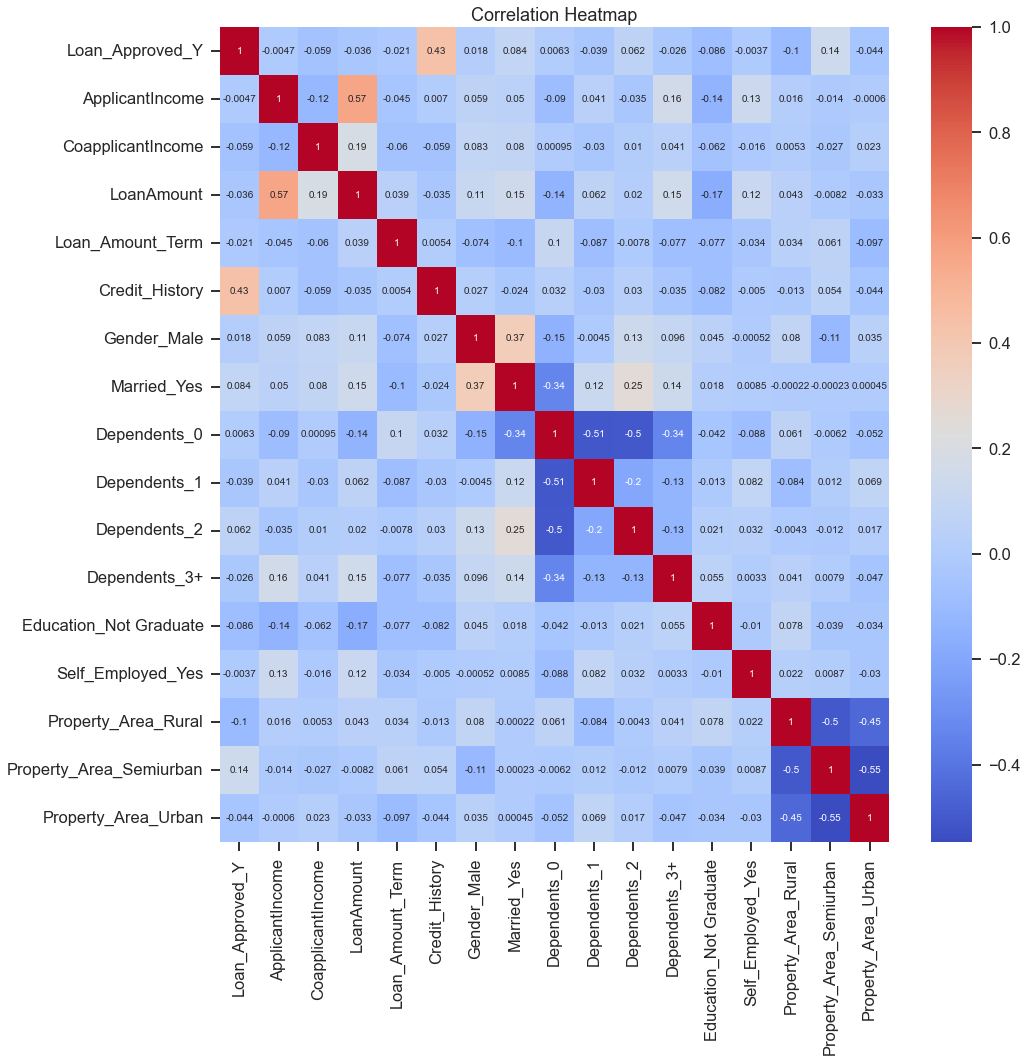

In [8]:
from woodPecker import dataExploration

X = df.drop(['Loan_Status', 'Loan_Approved_Y', 'Loan_ID'], axis = 1)
y = df['Loan_Approved_Y'] 

dataExploration(X,y, pairplot = False, full=False)  # having issues with the pairplot.. duplicated the y value (one normal, one boolean and will run correlation and pairplot separated)

In [9]:
df.corr()['Loan_Approved_Y'].abs().sort_values(ascending=False)

Loan_Approved_Y            1.000000
Credit_History             0.432616
Property_Area_Semiurban    0.136540
Property_Area_Rural        0.100694
Education_Not Graduate     0.085884
Married_Yes                0.084281
Dependents_2               0.062384
CoapplicantIncome          0.059188
Property_Area_Urban        0.043621
Dependents_1               0.038740
LoanAmount                 0.036345
Dependents_3+              0.026123
Loan_Amount_Term           0.020974
Gender_Male                0.017987
Dependents_0               0.006250
ApplicantIncome            0.004710
Self_Employed_Yes          0.003700
Name: Loan_Approved_Y, dtype: float64

Credit History appear to have somewhat of a correlation. Property area seem to be correlated as well.

#### Pair plot

Let's look if some combination of factors can help define if someone will get a loan approved or not:

<Figure size 1080x1080 with 0 Axes>

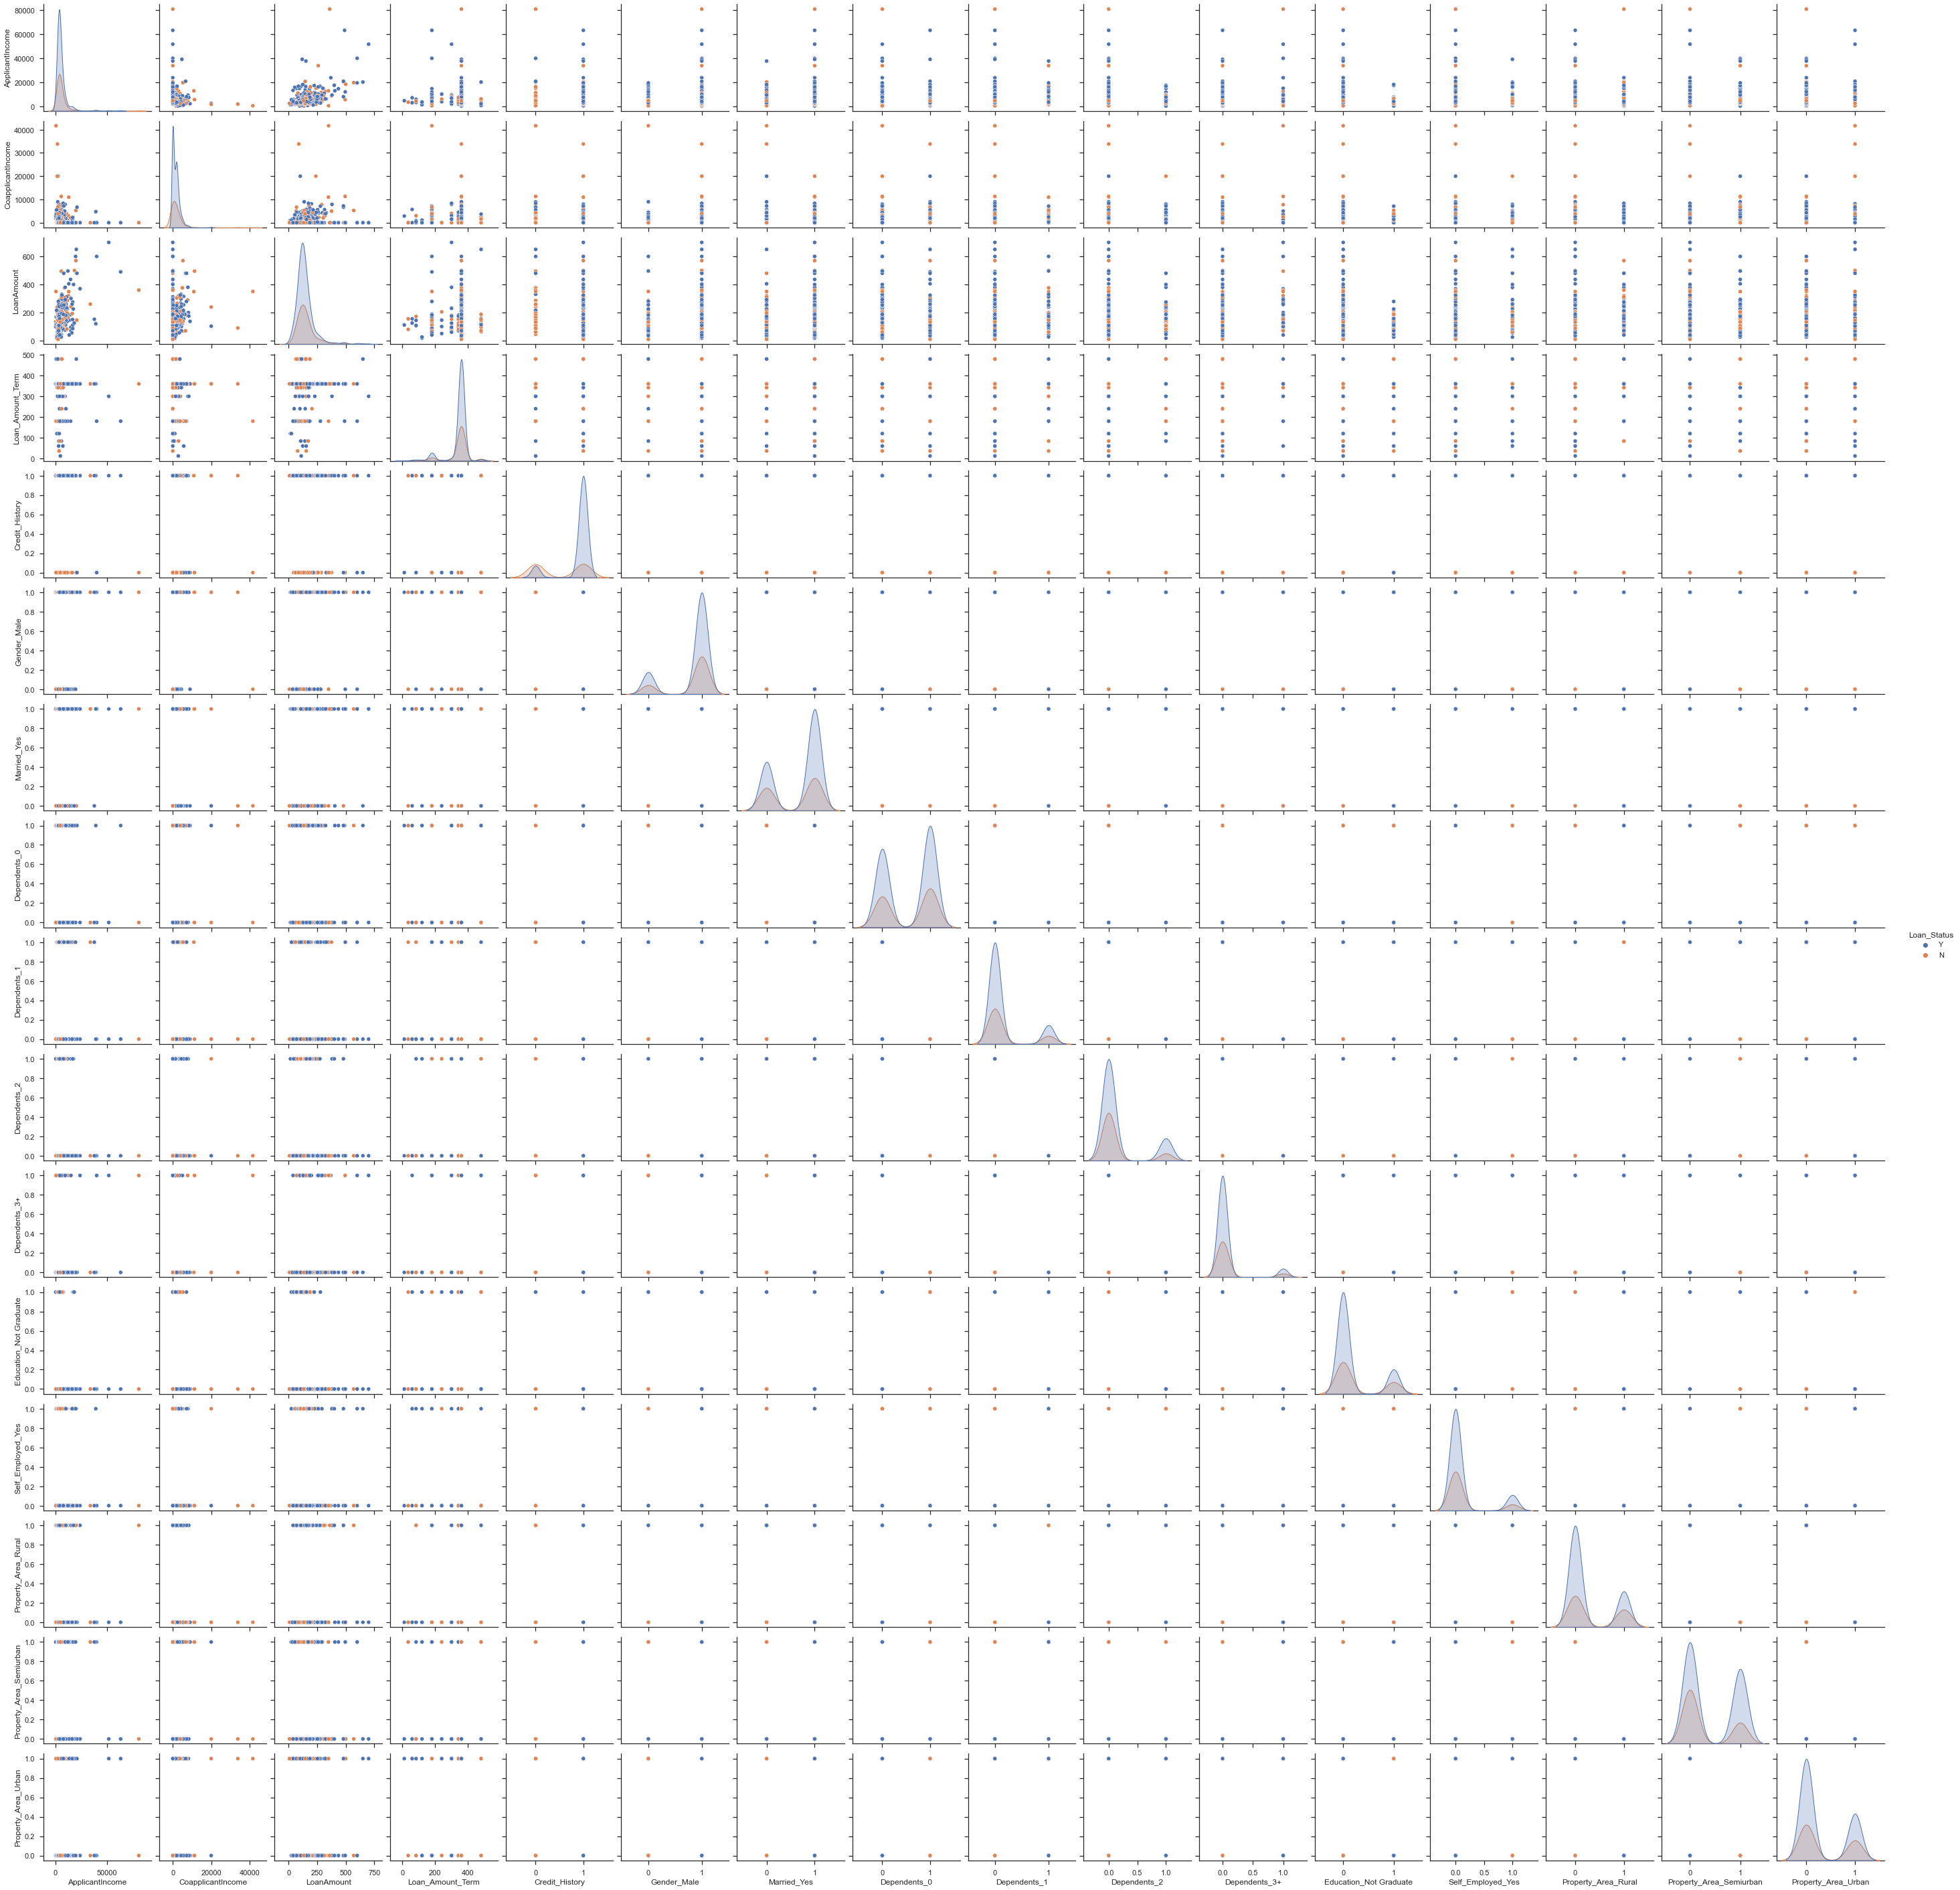

In [10]:
from woodPecker import dataExploration

X = df.drop(['Loan_Status', 'Loan_Approved_Y', 'Loan_ID'], axis = 1)
y = df['Loan_Status'] 

dataExploration(X,y, correlation = False, full=False)  # having issues with the pairplot.. duplicated the y value (one normal, one boolean and will run correlation and pairplot separated)

Credit History, the amount of the loan and income of the applicant appear to be key features.

#### Distribution and Box Plots

####  ApplicantIncome


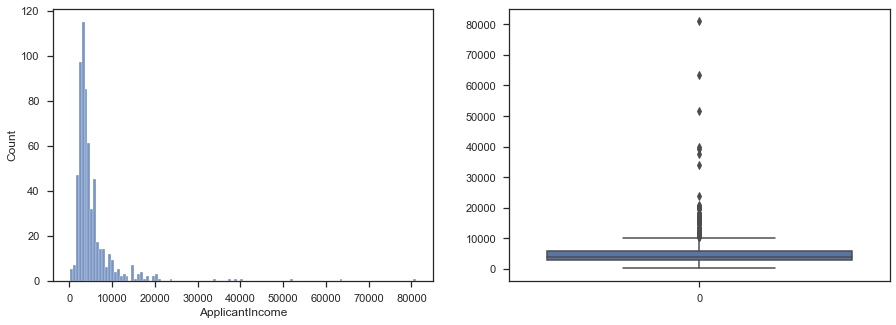


####  CoapplicantIncome


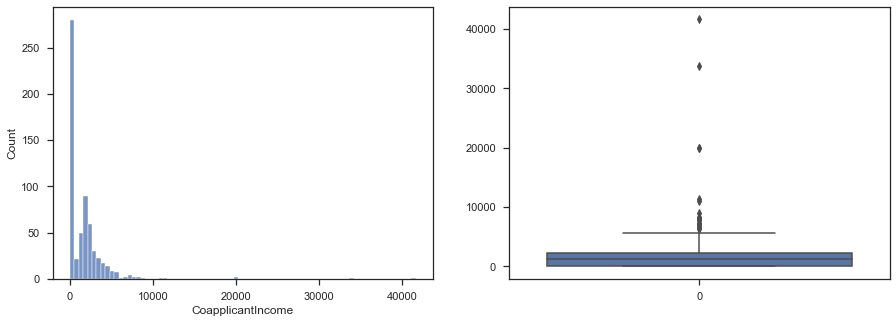


####  LoanAmount


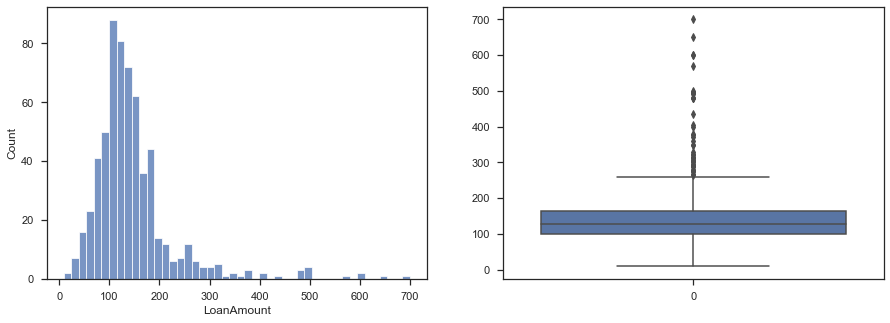


####  Loan_Amount_Term


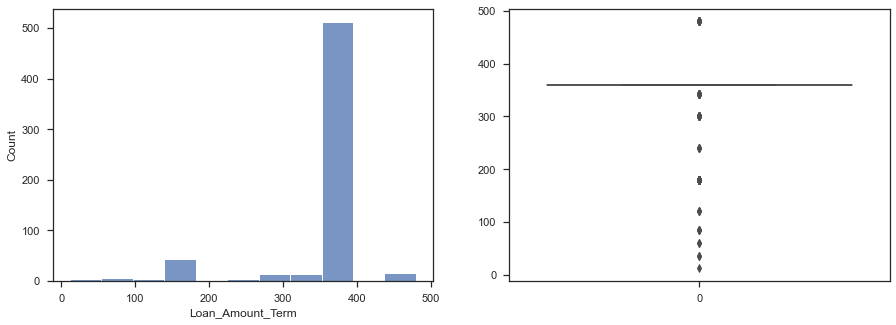


####  Credit_History


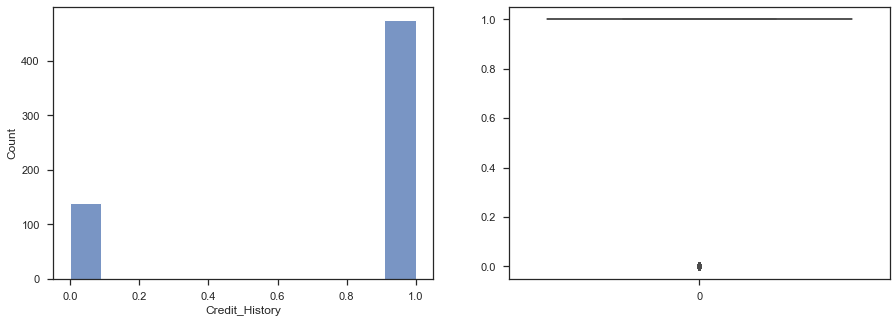


####  Gender_Male


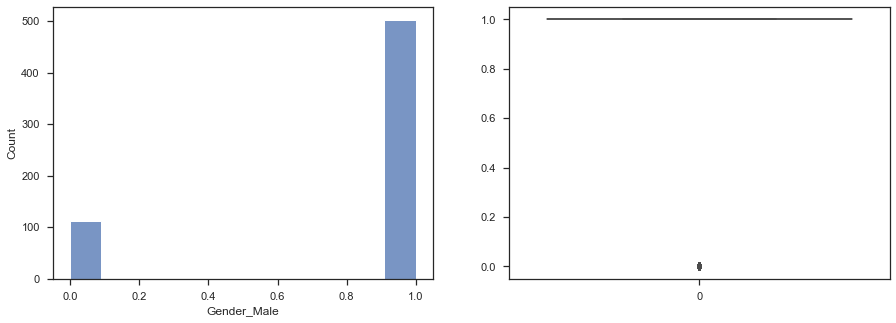


####  Married_Yes


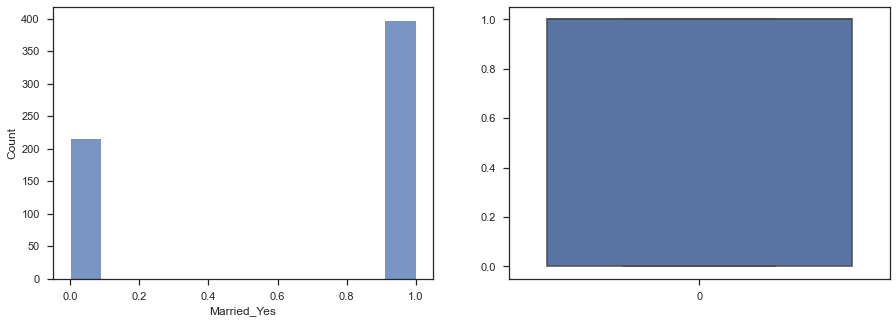


####  Dependents_0


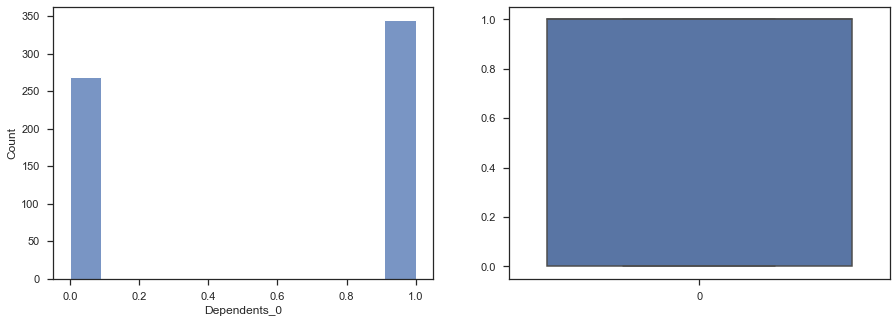


####  Dependents_1


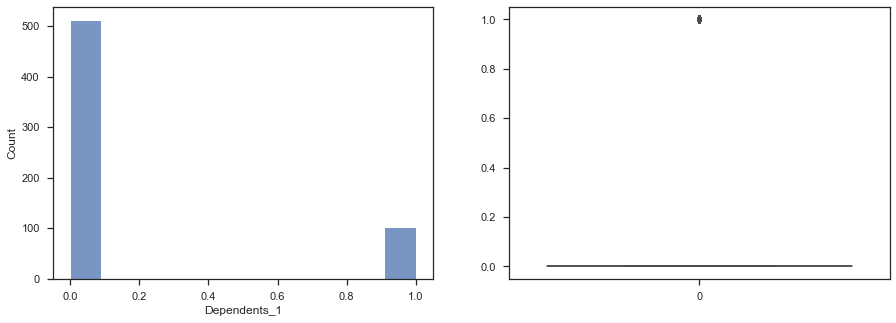


####  Dependents_2


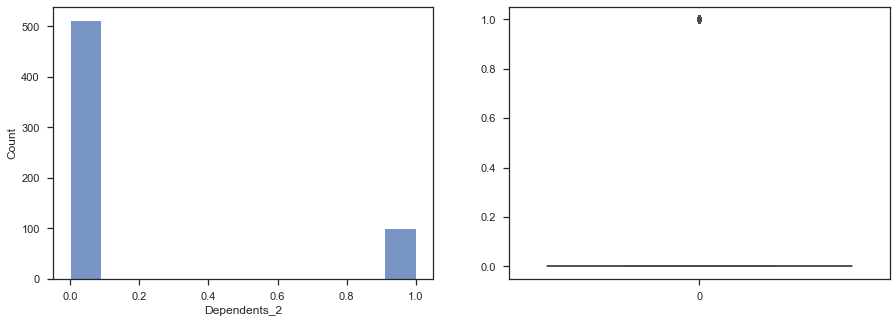


####  Dependents_3+


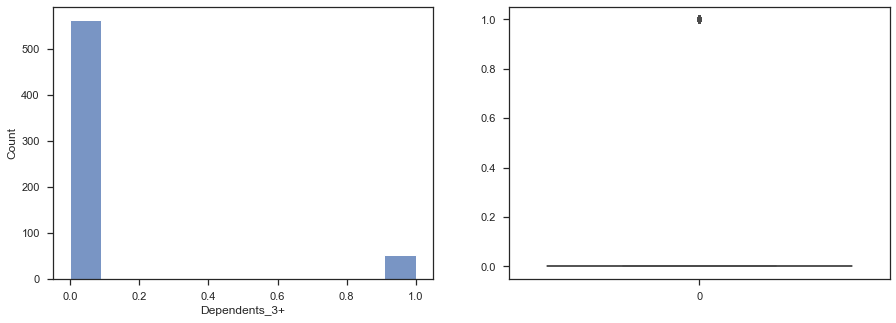


####  Education_Not Graduate


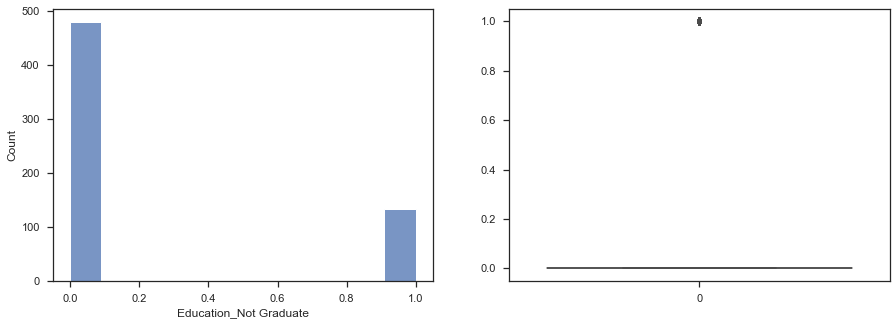


####  Self_Employed_Yes


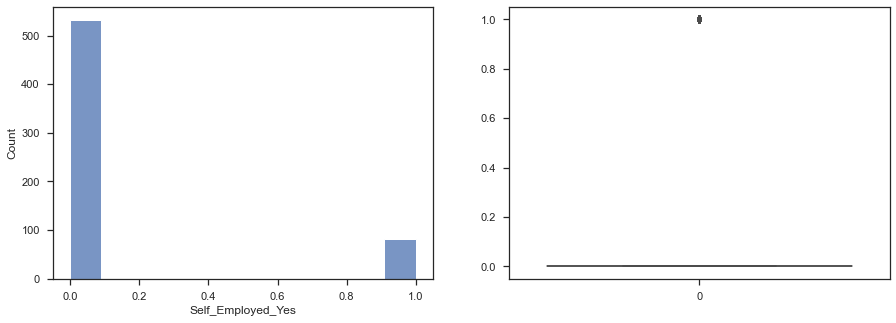


####  Property_Area_Rural


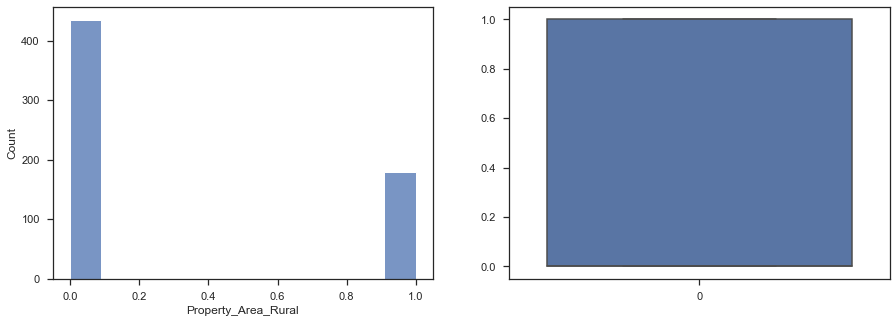


####  Property_Area_Semiurban


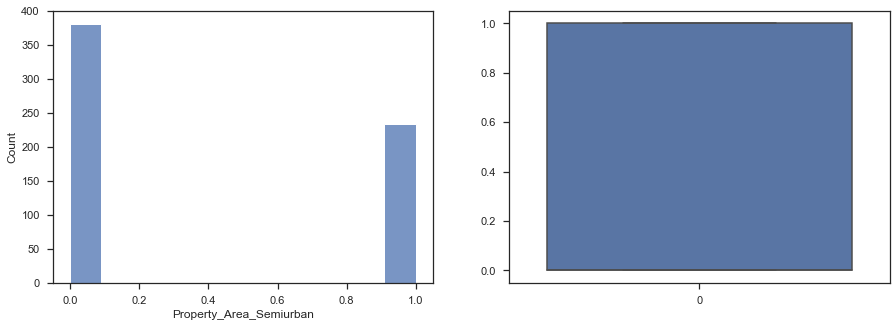


####  Property_Area_Urban


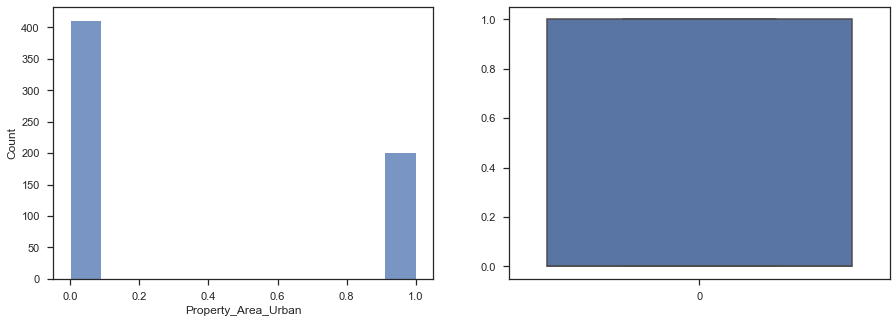

In [11]:
from woodPecker import dataExploration

X = df.drop(['Loan_Status', 'Loan_Approved_Y', 'Loan_ID'], axis = 1)
y = df['Loan_Status'] 

dataExploration(X,y, correlation = False, pairplot=False)

### One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

See Data Cleaning for actions taken

### Look at some basic statistics for numerical variables.

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,146.397394,342.000000,0.773616,0.817590,0.648208,0.561889,0.166124,0.164495,0.083062,0.218241,0.133550,0.291531,0.379479,0.328990
std,6109.041673,2926.24876,84.037503,64.372489,0.418832,0.386497,0.477919,0.496559,0.372495,0.371027,0.276201,0.413389,0.340446,0.454838,0.485653,0.470229
min,150.000000,0.00000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.50000,129.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [13]:
print("Applicants with Credit History: ", df.loc[df['Credit_History'] == 1].shape[0])
print("Total Applicants: ", df.shape[0])

Applicants with Credit History:  475
Total Applicants:  614


#### Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

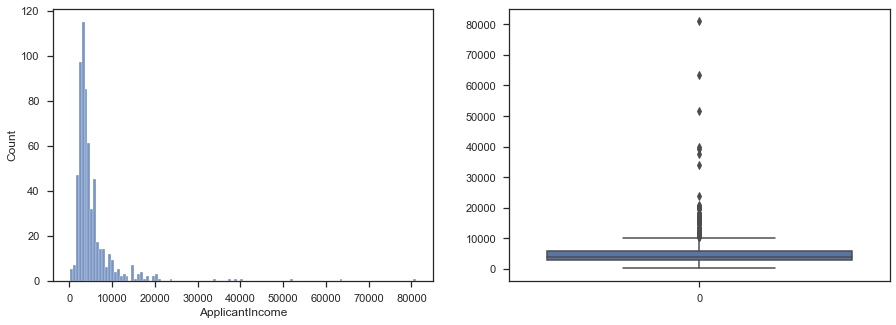

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['ApplicantIncome'])
plt.subplot(1,2,2)
sns.boxplot(df['ApplicantIncome'])
plt.show()

It is very right-skewed, possibly because some are monthly and others yearly? 

### Assuming income over 10,000 are formatting issues and yearly income rather than monthly, let's see how this does (dropped)

Let's treat the values over 10,000 as formatting issues and divide them by 12 to bring them to monthly income. It could end up being wrong as some people are probably doing over 10,000 a month, but we'll 

In [15]:
# Change the values of 'ApplicantIncome' where 'ApplicantIncome' is greater than 10000 to their values / 12
## Don't wanna edit the main df for now, so let's make a copy
df2 = df.copy()
df2.loc[df2['ApplicantIncome'] > 10000, 'ApplicantIncome'] = df2.loc[df2['ApplicantIncome'] > 10000, 'ApplicantIncome'] / 12

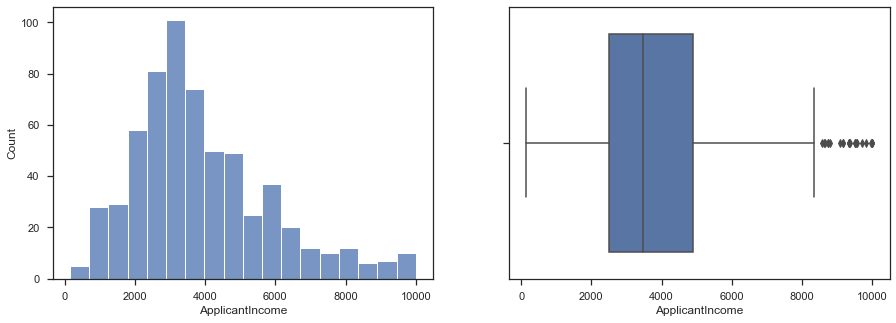

In [16]:
# Make a 1x2 subplot with a histogram and a horizontal boxplot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='ApplicantIncome', data=df2)
plt.subplot(1,2,2)
sns.boxplot(x='ApplicantIncome', data=df2)
plt.show()

This could be a way to treat the outliers for applicant income. However, it is possible some people make up to a million a year. It would be hard to know the difference. Therefore, let's assume our high outliers are not formatting issues.

### Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

Done already in Data Cleaning. Values have been converted to dummy variables

### Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

Done above in Data Exploration

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



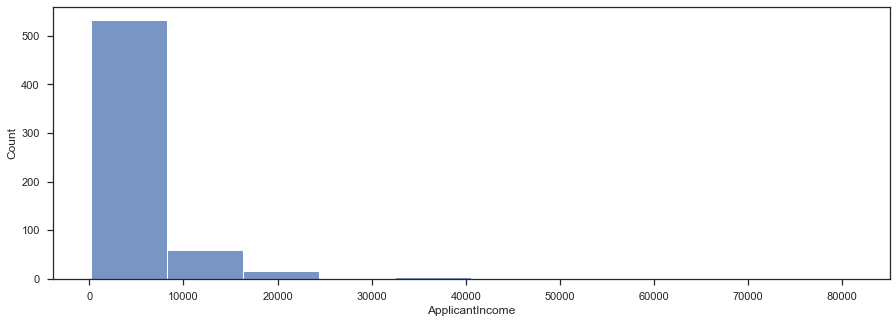

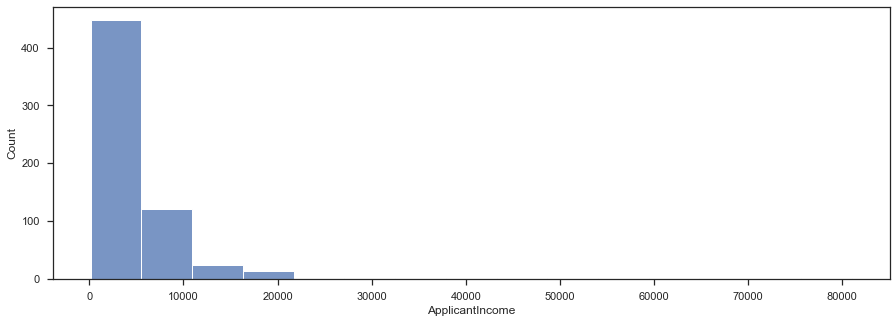

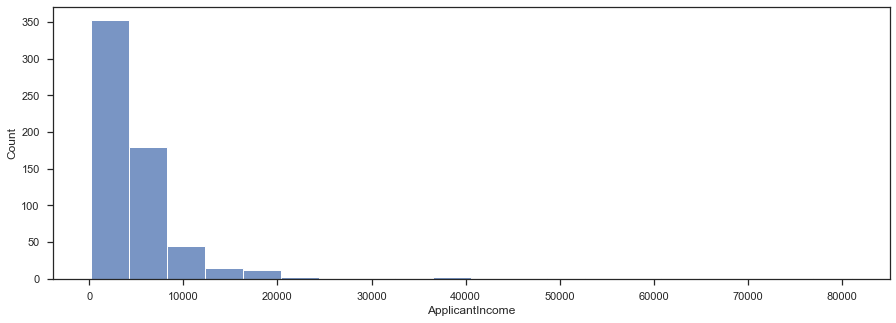

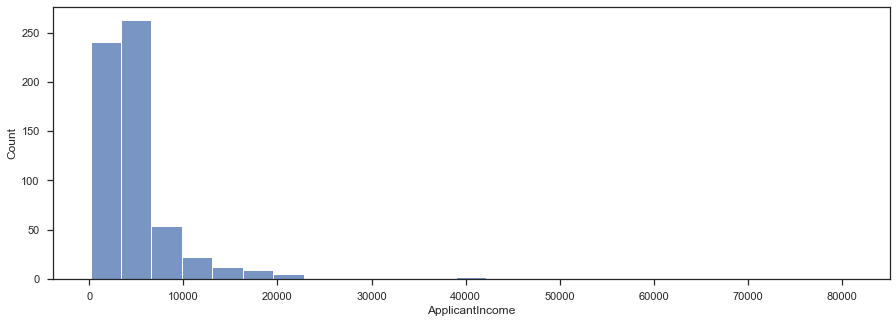

In [17]:
# Working off the temp df df2

plt.figure(figsize=(15,5))
sns.histplot(x='ApplicantIncome', data=df, bins=10)
plt.show()
plt.figure(figsize=(15,5))
sns.histplot(x='ApplicantIncome', data=df, bins=15)
plt.show()
plt.figure(figsize=(15,5))
sns.histplot(x='ApplicantIncome', data=df, bins=20)
plt.show()
plt.figure(figsize=(15,5))
sns.histplot(x='ApplicantIncome', data=df, bins=25)
plt.show()

This is not great.. we will need to set our bins manually

### Look at box plots to understand the distributions. 

Done above in Data Exploration

### Look at the distribution of income segregated  by `Education`

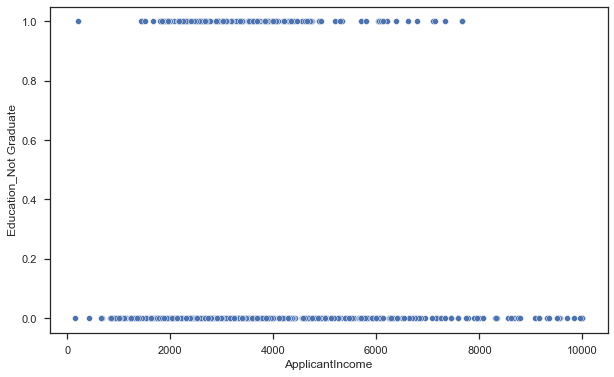

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='Education_Not Graduate', data=df2)
plt.show()

### Look at the histogram and boxplot of LoanAmount

Done above in Data Exploration

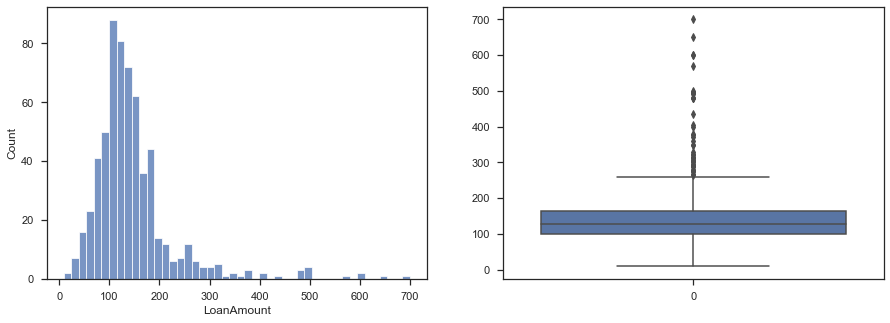

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['LoanAmount'])
plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])
plt.show()

### There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

one hot encoded already

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

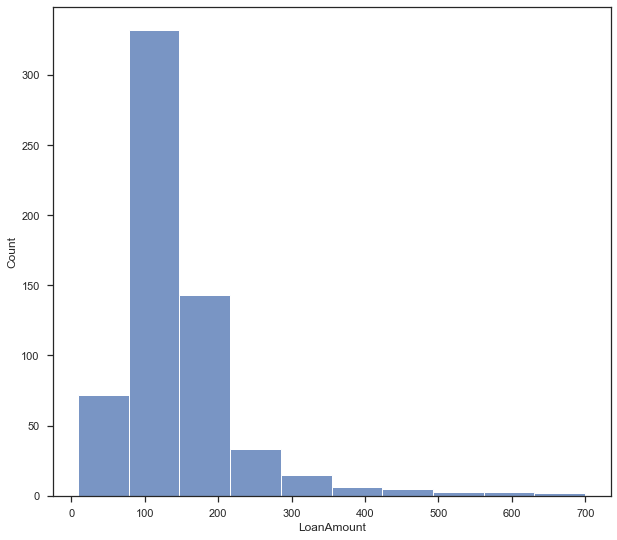

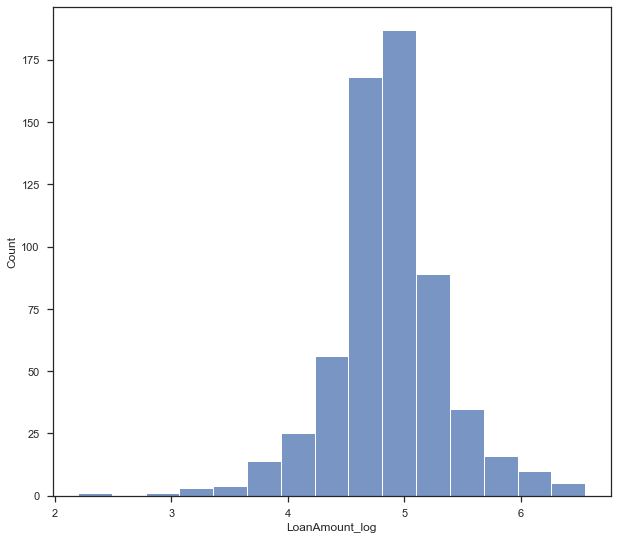

In [20]:
plt.figure(figsize=(10, 9))
sns.histplot(df['LoanAmount'], kde=False, bins=10)
plt.show()

df['LoanAmount_log'] = np.log(df['LoanAmount'])

plt.figure(figsize=(10, 9))
sns.histplot(df['LoanAmount_log'], kde=False, bins=15)
plt.show()

Much better, let's set this as our LoanAmount

After some thought I think I'd rather use fixed bins

In [21]:
bin_ranges=[0,50,100,150,200,250,300,1000]
bin_names=[0,1,2,3,4,5,6]

df['LoanAmount_label'] = pd.cut(np.array(df['LoanAmount']), bins = bin_ranges, labels=bin_names)
df['LoanAmount_label'] = df['LoanAmount_label'].astype('int64')

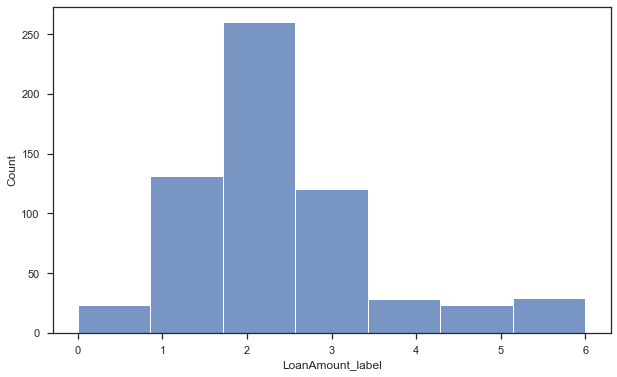

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount_label'],bins=7)
plt.show()

#### Combine both incomes as total income and take a log transformation of the same.

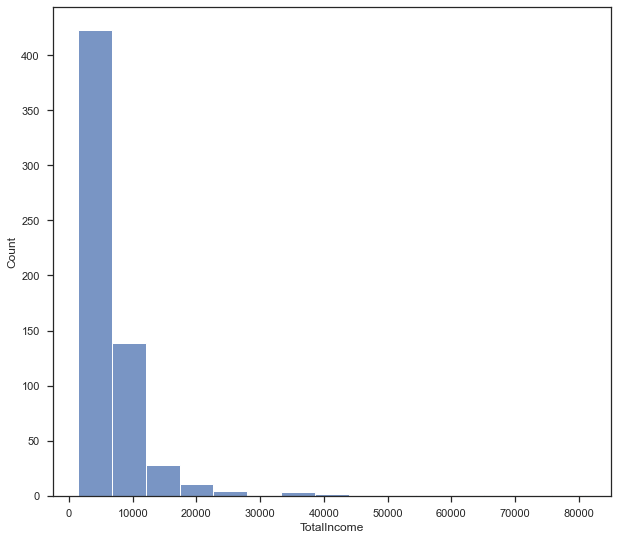

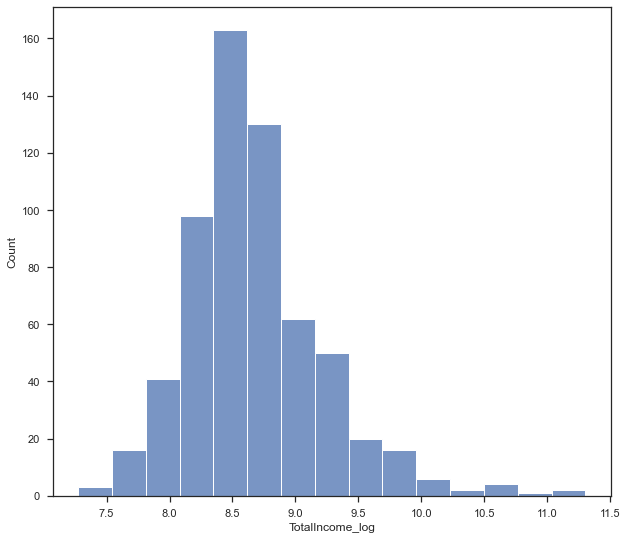

In [23]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

plt.figure(figsize=(10, 9))
sns.histplot(df['TotalIncome'], kde=False, bins=15)
plt.show()

df['TotalIncome_log'] = np.log(df['TotalIncome'])

plt.figure(figsize=(10, 9))
sns.histplot(df['TotalIncome_log'], kde=False, bins=15)
plt.show()

Much better, let's use this one instead of our incomes

In [24]:
df['LoanAmount_label'] = pd.cut(np.array(df['LoanAmount']), bins = bin_ranges, labels=bin_names)
df['LoanAmount_label'] = df['LoanAmount_label'].astype('int64')

#### Loan Amount terms

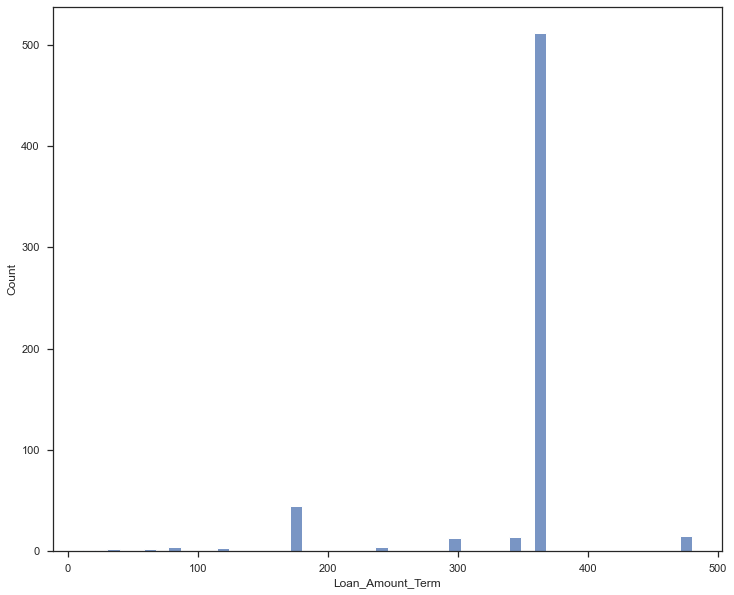

In [25]:
plt.figure(figsize=(12, 10))
sns.histplot(df['Loan_Amount_Term'], kde=False, bins=50)
plt.show()

The majority of the values are around the same thing.. I won't use this feature in my model

#### Just rerunning Data Exploration to see changes (could be dropped)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    int64  
 3   LoanAmount               614 non-null    int64  
 4   Loan_Amount_Term         614 non-null    int64  
 5   Credit_History           614 non-null    int64  
 6   Loan_Status              614 non-null    object 
 7   Gender_Male              614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Dependents_0             614 non-null    uint8  
 10  Dependents_1             614 non-null    uint8  
 11  Dependents_2             614 non-null    uint8  
 12  Dependents_3+            614 non-null    uint8  
 13  Education_Not Graduate   614 non-null    uint8  
 14  Self_Employed_Yes        6

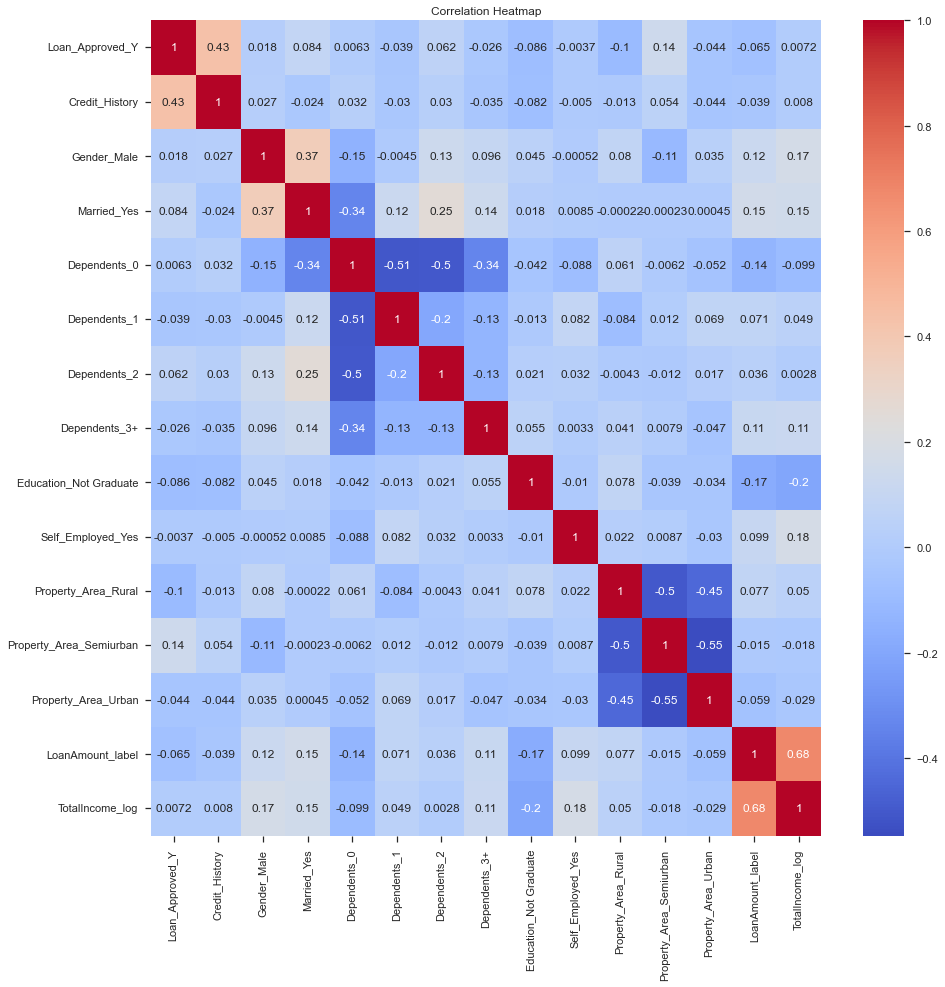

In [27]:
from woodPecker import dataExploration

X = df.drop(['Loan_Status', 'Loan_Approved_Y', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'LoanAmount_log', 'TotalIncome'], axis = 1)
y = df['Loan_Approved_Y'] 

dataExploration(X,y, pairplot = False, full=False)  # having issues with the pairplot.. duplicated the y value (one normal, one boolean and will run correlation and pairplot separated)

<Figure size 1080x1080 with 0 Axes>

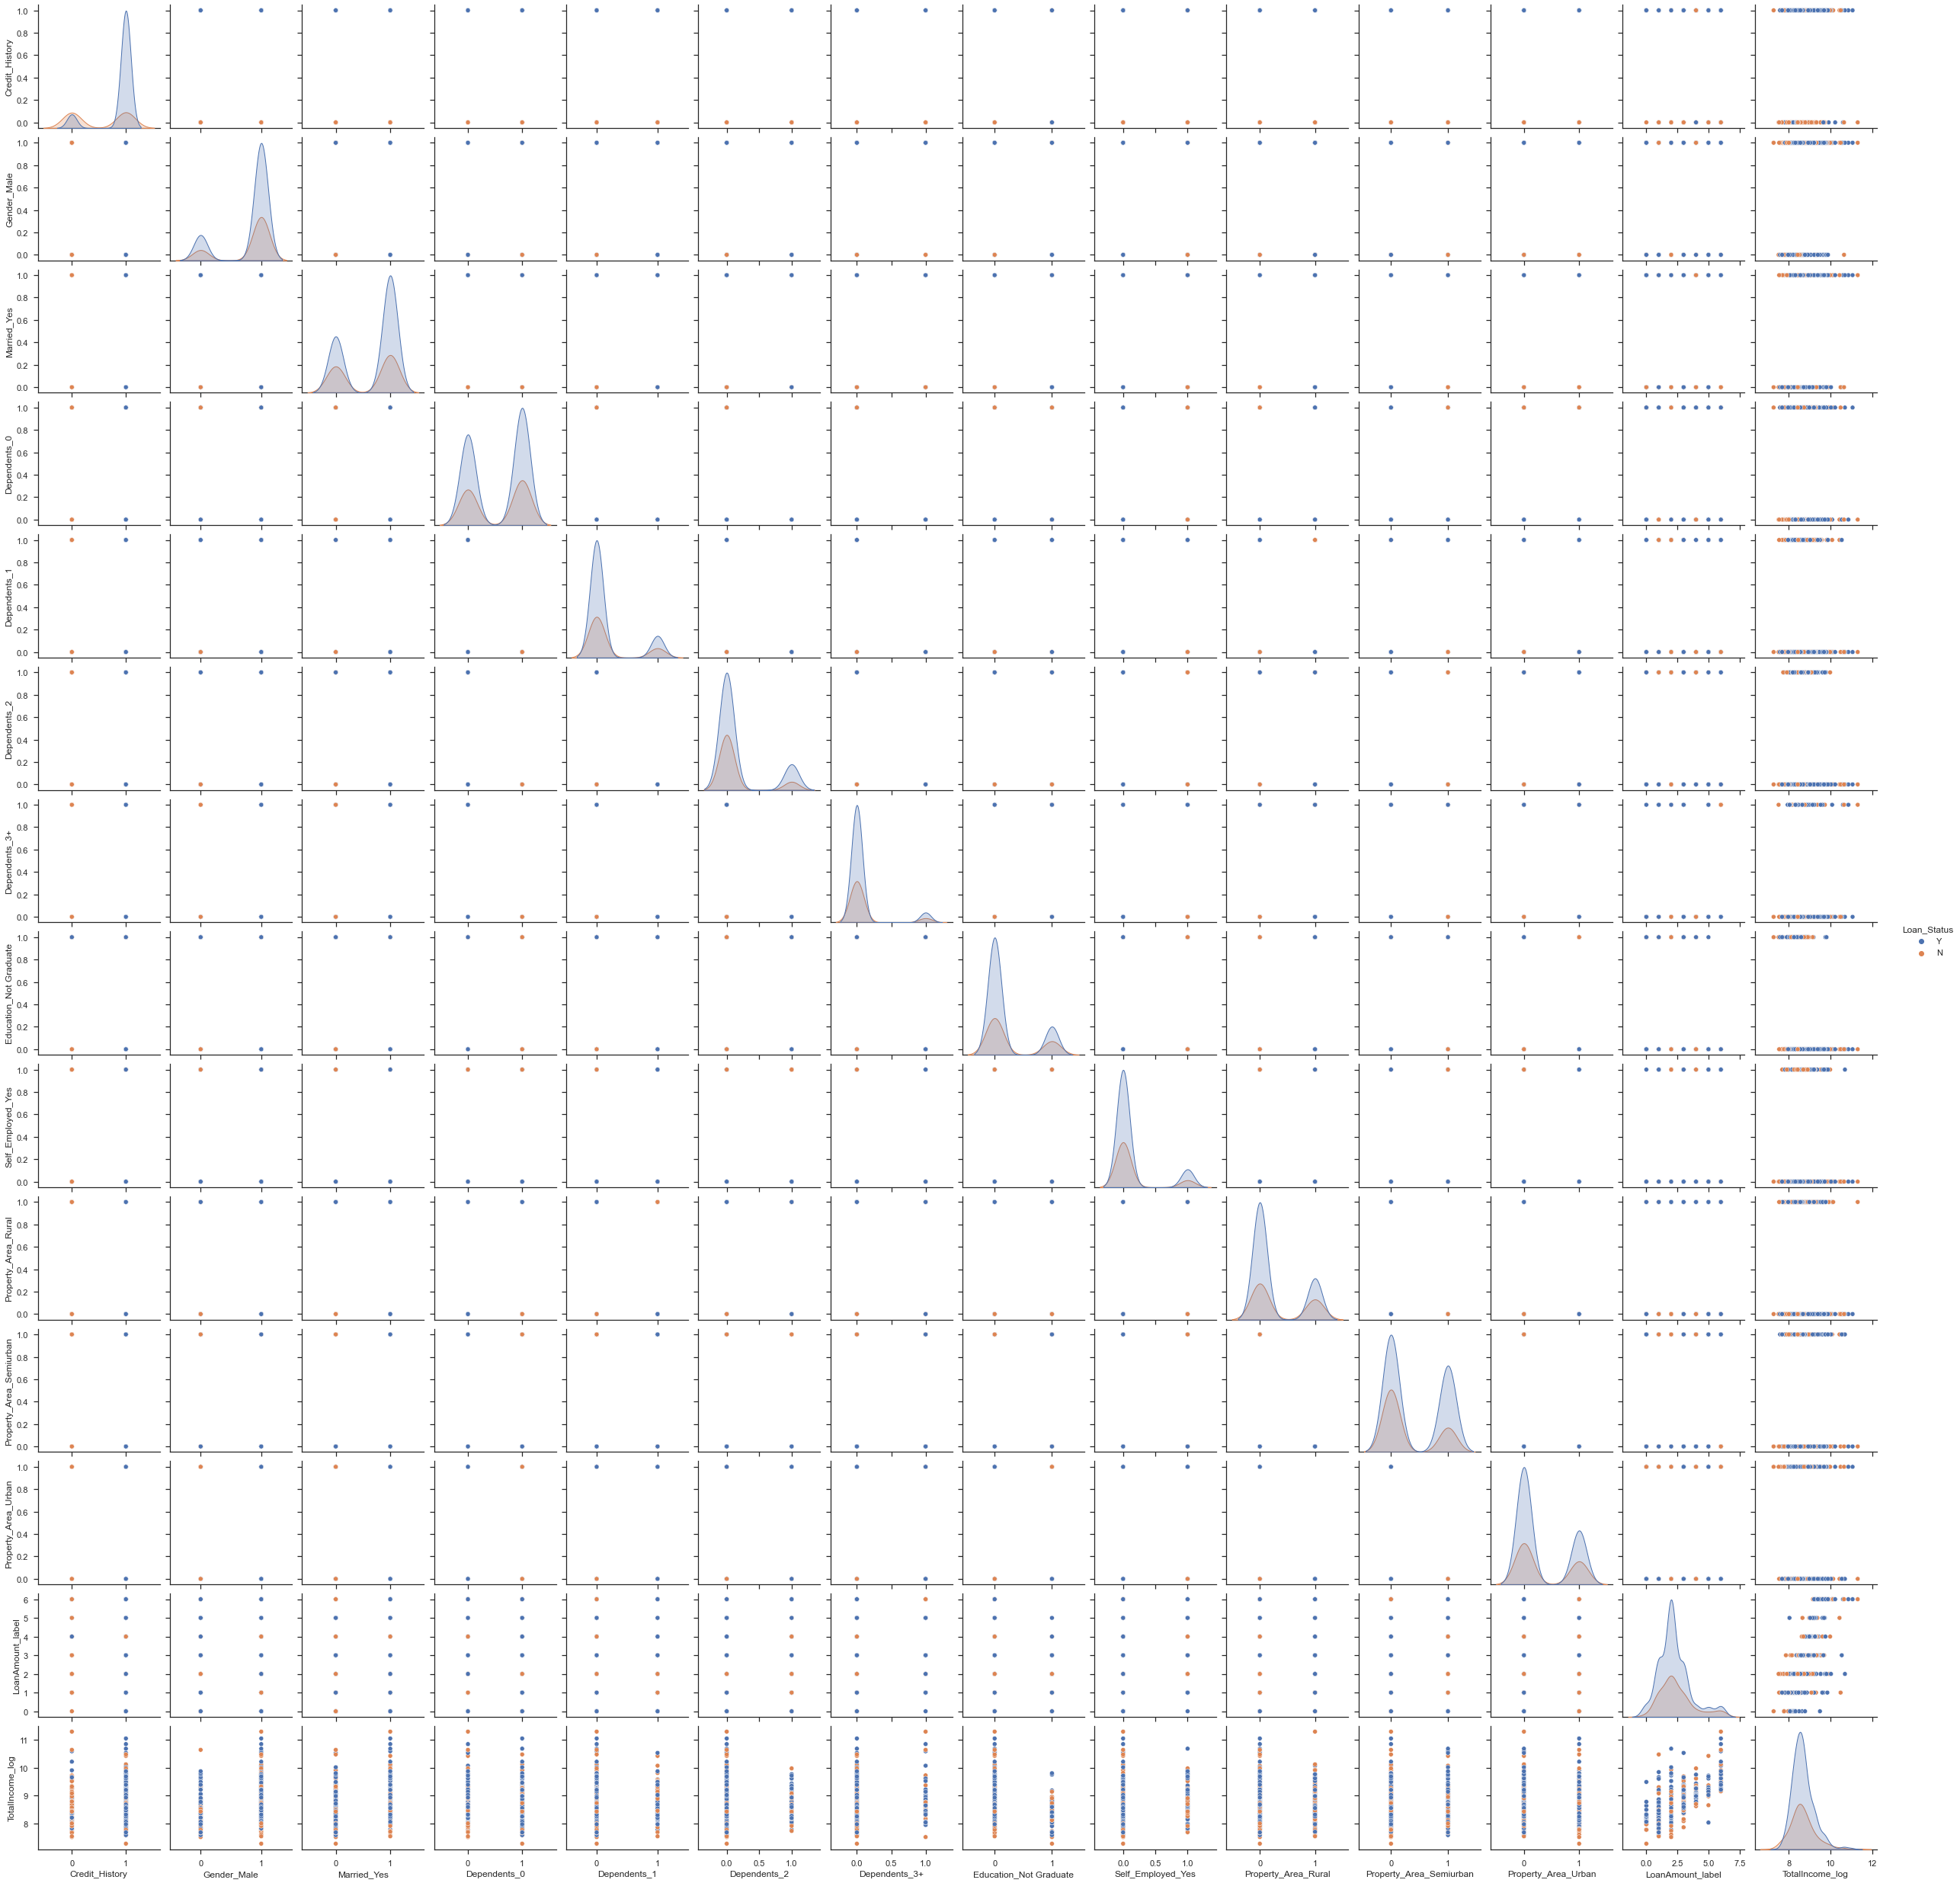

In [28]:
from woodPecker import dataExploration

X = df.drop(['Loan_Status', 'Loan_Approved_Y', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'LoanAmount_log', 'TotalIncome'], axis = 1)
y = df['Loan_Status'] 

dataExploration(X,y, correlation = False, full=False)  # having issues with the pairplot.. duplicated the y value (one normal, one boolean and will run correlation and pairplot separated)

## 4. Building a Predictive Model

Let's start by choosing what model would work best:

In [29]:
### Set X and y
X = df.drop(['Loan_Status', 'Loan_Approved_Y', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'LoanAmount_log', 'TotalIncome'], axis = 1)
y = df['Loan_Approved_Y'] 
# y = df['Loan_Status'] 

### convert to numpy array
# X=X.values
# y=y.values

### Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)


pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression())
])

parameters = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()]
              , 'model': [LinearRegression()
                          , RandomForestClassifier()
                          , KNeighborsClassifier()
                          , DecisionTreeClassifier()
                          , SVC()
                          , SGDClassifier()
                          , LogisticRegression()
                          , LinearRegression()
                          #, LinearSVC()  #recommended for dataset > 10,000
                          , xgb.XGBRegressor()
                          , RandomForestRegressor()
                          , DecisionTreeRegressor()
                          , KNeighborsRegressor()
                          , SVR()
                          , Ridge()
                          , Lasso()
                          , GaussianNB()
                          # , MultinomialNB()
                          # , ComplementNB()
                          # , BernoulliNB()
                          # , CategoricalNB()
                         ]
             }
   
#model.fit(X_train, y_train)
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

y_pred = grid.predict(X_test)

# Print Test Score
print("Train - R2 Score:", grid.score(X_train, y_train))
print("Test - R2 Score:", grid.score(X_test, y_test))

# Print the best model
## Test format
print("Best Model / Parameters:", grid.best_params_)
## Table Format
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
result_df.sort_values(by='rank_test_score').head(10)

Train - R2 Score: 0.7494908350305499
Test - R2 Score: 0.8536585365853658
Best Model / Parameters: {'model': SVC(), 'scaler': MinMaxScaler()}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_scaler,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
23,0.003514,5.136728e-04,0.001487,5.133152e-04,SGDClassifier(),MaxAbsScaler(),"{'model': SGDClassifier(), 'scaler': MaxAbsSca...",0.756098,0.730612,0.743355,0.012743,1
19,0.005485,4.836321e-04,0.007015,1.015425e-03,SVC(),MaxAbsScaler(),"{'model': SVC(), 'scaler': MaxAbsScaler()}",0.756098,0.730612,0.743355,0.012743,1
17,0.005997,1.072884e-06,0.007999,9.996891e-04,SVC(),MinMaxScaler(),"{'model': SVC(), 'scaler': MinMaxScaler()}",0.756098,0.730612,0.743355,0.012743,1
24,0.006499,1.499295e-03,0.002003,2.026558e-06,LogisticRegression(),StandardScaler(),"{'model': LogisticRegression(), 'scaler': Stan...",0.731707,0.734694,0.733201,0.001493,4
27,0.006500,4.996061e-04,0.001501,5.003214e-04,LogisticRegression(),MaxAbsScaler(),"{'model': LogisticRegression(), 'scaler': MaxA...",0.735772,0.726531,0.731151,0.004621,5
25,0.006500,4.992485e-04,0.001500,4.999638e-04,LogisticRegression(),MinMaxScaler(),"{'model': LogisticRegression(), 'scaler': MinM...",0.731707,0.726531,0.729119,0.002588,6
16,0.006002,1.788139e-06,0.007491,5.220175e-04,SVC(),StandardScaler(),"{'model': SVC(), 'scaler': StandardScaler()}",0.752033,0.702041,0.727037,0.024996,7
63,0.003000,4.768372e-07,0.001500,4.999638e-04,GaussianNB(),MaxAbsScaler(),"{'model': GaussianNB(), 'scaler': MaxAbsScaler()}",0.707317,0.669388,0.688352,0.018965,8
60,0.002998,2.741814e-06,0.001485,4.848242e-04,GaussianNB(),StandardScaler(),"{'model': GaussianNB(), 'scaler': StandardScal...",0.707317,0.669388,0.688352,0.018965,8
61,0.003496,5.036592e-04,0.001000,2.384186e-07,GaussianNB(),MinMaxScaler(),"{'model': GaussianNB(), 'scaler': MinMaxScaler()}",0.707317,0.669388,0.688352,0.018965,8


It seems SVC is our top-performer with min/max scaler, let's now see if we can fine tune it

#### Try paramater grid search to improve the results

In [30]:
### Set X and y
X = df.drop(['Loan_Status', 'Loan_Approved_Y', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'LoanAmount_log', 'TotalIncome'], axis = 1)
y = df['Loan_Approved_Y'] 
# y = df['Loan_Status'] 

### convert to numpy array
# X=X.values
# y=y.values

### Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)


pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', SVC())
])

parameters = {'model__C': [1.0]
              , 'model__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
              , 'model__degree': [1,2,3,4,5,6]
              , 'model__gamma': ['scale', 'auto']
              , 'model__coef0': [0.0, 0.1]
              , 'model__shrinking': [True, False]
              , 'model__probability': [False, True]
              , 'model__tol': [0.001, 0.01, 0.1, 0.0001, 1]
              , 'model__cache_size': [2000]
              , 'model__decision_function_shape': ['ovr', 'ovo']
             }
   
#model.fit(X_train, y_train)
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

y_pred = grid.predict(X_test)

# Print Test Score
print("Train - R2 Score:", grid.score(X_train, y_train))
print("Test - R2 Score:", grid.score(X_test, y_test))

# Print the best model
## Test format
print("Best Model / Parameters:", grid.best_params_)
## Table Format
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
result_df.sort_values(by='rank_test_score').head(10)

Train - R2 Score: 0.7494908350305499
Test - R2 Score: 0.8536585365853658
Best Model / Parameters: {'model__C': 1.0, 'model__cache_size': 2000, 'model__coef0': 0.0, 'model__decision_function_shape': 'ovr', 'model__degree': 1, 'model__gamma': 'scale', 'model__kernel': 'linear', 'model__probability': False, 'model__shrinking': True, 'model__tol': 0.001}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__cache_size,param_model__coef0,param_model__decision_function_shape,param_model__degree,param_model__gamma,param_model__kernel,param_model__probability,param_model__shrinking,param_model__tol,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
880,0.009001,0.000999,0.007999,0.000005,1.0,2000,0.0,ovr,6,auto,rbf,False,True,0.001,"{'model__C': 1.0, 'model__cache_size': 2000, '...",0.764228,0.734694,0.749461,0.014767,1
1071,0.011500,0.000502,0.002515,0.000485,1.0,2000,0.0,ovo,1,auto,linear,True,True,0.01,"{'model__C': 1.0, 'model__cache_size': 2000, '...",0.764228,0.734694,0.749461,0.014767,1
1070,0.014007,0.000993,0.001993,0.000008,1.0,2000,0.0,ovo,1,auto,linear,True,True,0.001,"{'model__C': 1.0, 'model__cache_size': 2000, '...",0.764228,0.734694,0.749461,0.014767,1
1069,0.004509,0.000509,0.002990,0.000010,1.0,2000,0.0,ovo,1,auto,linear,False,False,1,"{'model__C': 1.0, 'model__cache_size': 2000, '...",0.764228,0.734694,0.749461,0.014767,1
1068,0.004530,0.000501,0.002987,0.000011,1.0,2000,0.0,ovo,1,auto,linear,False,False,0.0001,"{'model__C': 1.0, 'model__cache_size': 2000, '...",0.764228,0.734694,0.749461,0.014767,1
1067,0.004000,0.001000,0.002500,0.000500,1.0,2000,0.0,ovo,1,auto,linear,False,False,0.1,"{'model__C': 1.0, 'model__cache_size': 2000, '...",0.764228,0.734694,0.749461,0.014767,1
1066,0.004519,0.000536,0.002980,0.000007,1.0,2000,0.0,ovo,1,auto,linear,False,False,0.01,"{'model__C': 1.0, 'model__cache_size': 2000, '...",0.764228,0.734694,0.749461,0.014767,1
1065,0.005515,0.000513,0.003482,0.000484,1.0,2000,0.0,ovo,1,auto,linear,False,False,0.001,"{'model__C': 1.0, 'model__cache_size': 2000, '...",0.764228,0.734694,0.749461,0.014767,1
1064,0.004010,0.000982,0.004988,0.002017,1.0,2000,0.0,ovo,1,auto,linear,False,True,1,"{'model__C': 1.0, 'model__cache_size': 2000, '...",0.764228,0.734694,0.749461,0.014767,1
1063,0.006016,0.000987,0.002983,0.000012,1.0,2000,0.0,ovo,1,auto,linear,False,True,0.0001,"{'model__C': 1.0, 'model__cache_size': 2000, '...",0.764228,0.734694,0.749461,0.014767,1


As we can see in the table the results of the top 10 results are the same. As we have the same score as the default values from the previous test, we'll keep it like that

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

Let's add the data prep and feature engineering steps into the Pipeline.

In [31]:
### Import data
df = pd.read_csv("../data/raw/data.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [32]:
### Import data
df = pd.read_csv("../data/raw/data.csv") 

### Switch y column to binary value ***Model training/testing only, no need to add to Pipeline
df = pd.get_dummies(df, columns=['Loan_Status'], drop_first=True) 
y = df['Loan_Status_Y']

### Create TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

### Set X
X = df.drop(['Loan_Status_Y'], axis = 1)

### Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

#### ============================================================ Pipeline ==================================================================================
## Assign variables to their appropriate 'pipeline start point'
# Categories
X_cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Dependents', 'Property_Area']

# Numerical columns
X_num_cols = ['TotalIncome', 'LoanAmount', 'Credit_History',]                

## Create the different pipelines
# Categories
cat_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='UNK')) #Instead of merging this data with the most frequent, let's create a separate unknown value.
                               #('impute', SimpleImputer(strategy='most_frequent'))
                               , ('one-hot', OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse=False))
                              ])

# Numerical
num_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='constant')) #fill missing with 0s
                                , ('log_transformer', FunctionTransformer(np.log1p, validate=True))
                                , ('scale', MinMaxScaler())
                                ])

col_trans = ColumnTransformer(transformers=[('num_pipeline', num_pipeline, X_num_cols)
                                            , ('cat_pipeline', cat_pipeline, X_cat_cols)
                                            ], remainder='drop', n_jobs=-1)  #Drop the other columns, run both job concurrently

## Add the model that was previously deemed the best-performer
best_model = SVC()
                    
## Combine it all
model_pipeline = Pipeline(steps=[('col_trans', col_trans)
                                  , ('model', best_model)
                                ])
#### ============================================================ Pipeline ==================================================================================

## Train the model
model = model_pipeline.fit(X_train, y_train)

## Test the model, by predicting y
y_pred = model.predict(X_test)

## Print Test Score
print("Train score:", model.score(X_train, y_train)) 
print("Test score:", model.score(X_test, y_test))

Train score: 0.7494908350305499
Test score: 0.8536585365853658


In [33]:
model_pipeline

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('log_transformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['TotalIncome', 'LoanAmount',
                                                   'Credit_History']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='UNK',
                                                                                 strategy='constant')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Dependents',
                                                   'Property_Area'])])),
                ('model', SVC())])

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

Save model into a pickle

In [34]:
pickle.dump(model, open('../src/savedModel.pkl', 'wb'))

Let's confirm it works:

In [35]:
unpickled_model = pickle.load(open('../src/savedModel.pkl', 'rb'))

y_pred = unpickled_model.predict(X_test)

## Print Test Score
print("Test score:", unpickled_model.score(X_test, y_test))

Test score: 0.8536585365853658


Now the columns

In [36]:
model_columns = list(X.columns)
pickle.dump(model_columns, open('../src/modelColumns.pkl', 'wb'))

In [37]:
X.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome'],
      dtype='object')

Let's get a random entry from our data and use it as out test

In [38]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Y,TotalIncome
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,0,7535.0


Total Income would not be included in our sample, we need to calculate it so it won't be included in the test.py

Ok so the model is launched locally. Let's see if this works:

In [39]:
## Python test for flask to test locally
import requests as r
import pandas as pd
import json


base_url = 'http://127.0.0.1:5000/' #base url local host

json_data = {
            "Loan_ID": "LP001097",
            "Gender": "Male",
            "Married": "No",
            "Dependents": 1,
            "Education": "Graduate",
            "Self_Employed": "Yes",
            "ApplicantIncome": 4692,
            "CoapplicantIncome": 0.0,
            "LoanAmount": 106.0,
            "Loan_Amount_Term": 360.0,
            "Credit_History": 1.0,
            "Property_Area": "Rural"
            }
## -> Should not be approved


# Get Response
# response = r.get(base_url)
response = r.post(base_url + "prediction", json = json_data)
print(response.text)

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /prediction (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001AB09EE11F0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

Well it's not accurate but it works! wouhou! Let's deploy and we'll look to increase the accuracy of the model after.